In [1]:
!unzip '/content/Animal_Dataset.zip'

Archive:  /content/Animal_Dataset.zip
   creating: dataset/
   creating: dataset/Testing/
   creating: dataset/Testing/bears/
  inflating: dataset/Testing/bears/k4 (100).jpeg  
  inflating: dataset/Testing/bears/k4 (100).jpg  
  inflating: dataset/Testing/bears/k4 (101).jpeg  
  inflating: dataset/Testing/bears/k4 (101).jpg  
  inflating: dataset/Testing/bears/k4 (102).jpeg  
  inflating: dataset/Testing/bears/k4 (102).jpg  
  inflating: dataset/Testing/bears/k4 (103).jpeg  
  inflating: dataset/Testing/bears/k4 (104).jpeg  
  inflating: dataset/Testing/bears/k4 (105).jpeg  
  inflating: dataset/Testing/bears/k4 (106).jpeg  
  inflating: dataset/Testing/bears/k4 (107).jpeg  
  inflating: dataset/Testing/bears/k4 (108).jpeg  
  inflating: dataset/Testing/bears/k4 (109).jpeg  
  inflating: dataset/Testing/bears/k4 (110).jpeg  
  inflating: dataset/Testing/bears/k4 (71).jpg  
  inflating: dataset/Testing/bears/k4 (72).jpeg  
  inflating: dataset/Testing/bears/k4 (72).jpg  
  inflating: da

In [2]:
# Data Augmentation

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255))
#--> (0 to 255) convert to (0 to 1)

In [5]:
train = train_gen.flow_from_directory('/content/dataset/Training',
                                      target_size=(120, 120),
                                      class_mode='categorical',
                                      batch_size=8)
test = test_gen.flow_from_directory('/content/dataset/Testing',
                                    target_size=(120, 120),
                                      class_mode='categorical',
                                      batch_size=8)

Found 1238 images belonging to 4 classes.
Found 326 images belonging to 4 classes.


In [6]:
train.class_indices

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}

#CNN

In [7]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [8]:
model = Sequential()
model.add(Convolution2D(20,(3,3),activation='relu',input_shape=(120, 120, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(45,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [9]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
model.fit(train,batch_size=8,validation_data=test,epochs=10)

Epoch 1/10
155/155 [==============================] - 25s 151ms/step - loss: 1.8587 - accuracy: 0.3586 - val_loss: 1.1977 - val_accuracy: 0.3374
Epoch 2/10
155/155 [==============================] - 24s 154ms/step - loss: 1.0770 - accuracy: 0.4992 - val_loss: 0.8803 - val_accuracy: 0.6933
Epoch 3/10
155/155 [==============================] - 23s 150ms/step - loss: 0.8444 - accuracy: 0.7044 - val_loss: 0.5600 - val_accuracy: 0.8344
Epoch 4/10
155/155 [==============================] - 24s 156ms/step - loss: 0.5739 - accuracy: 0.8166 - val_loss: 0.2700 - val_accuracy: 0.9325
Epoch 5/10
155/155 [==============================] - 24s 153ms/step - loss: 0.3685 - accuracy: 0.8869 - val_loss: 0.2030 - val_accuracy: 0.9479
Epoch 6/10
155/155 [==============================] - 23s 146ms/step - loss: 0.2381 - accuracy: 0.9346 - val_loss: 0.1315 - val_accuracy: 0.9785
Epoch 7/10
155/155 [==============================] - 22s 143ms/step - loss: 0.1377 - accuracy: 0.9725 - val_loss: 0.0864 - val_ac

In [ ]:
model.save('animal.h5')

Testing

In [17]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [18]:
img = image.load_img('/content/Z (8).jpeg',target_size=(120,120))

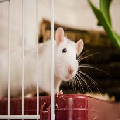

In [19]:
img

In [20]:
img = image.img_to_array(img)
img

array([[[179., 163., 150.],
        [180., 164., 151.],
        [172., 156., 143.],
        ...,
        [184., 165., 150.],
        [184., 165., 148.],
        [183., 161., 140.]],

       [[137., 121., 108.],
        [133., 117., 104.],
        [138., 122., 109.],
        ...,
        [185., 166., 149.],
        [184., 165., 148.],
        [181., 159., 138.]],

       [[138., 122., 109.],
        [149., 133., 120.],
        [168., 152., 139.],
        ...,
        [185., 166., 149.],
        [185., 166., 149.],
        [180., 158., 137.]],

       ...,

       [[168., 158., 149.],
        [169., 159., 150.],
        [170., 160., 151.],
        ...,
        [119.,  67.,  46.],
        [118.,  66.,  45.],
        [113.,  60.,  44.]],

       [[151., 138., 132.],
        [152., 139., 133.],
        [153., 140., 134.],
        ...,
        [123.,  71.,  50.],
        [123.,  71.,  50.],
        [118.,  67.,  48.]],

       [[ 26.,  10.,  11.],
        [ 27.,  11.,  12.],
        [ 28.,  

In [21]:
img = np.expand_dims(img,axis=0)
img

array([[[[179., 163., 150.],
         [180., 164., 151.],
         [172., 156., 143.],
         ...,
         [184., 165., 150.],
         [184., 165., 148.],
         [183., 161., 140.]],

        [[137., 121., 108.],
         [133., 117., 104.],
         [138., 122., 109.],
         ...,
         [185., 166., 149.],
         [184., 165., 148.],
         [181., 159., 138.]],

        [[138., 122., 109.],
         [149., 133., 120.],
         [168., 152., 139.],
         ...,
         [185., 166., 149.],
         [185., 166., 149.],
         [180., 158., 137.]],

        ...,

        [[168., 158., 149.],
         [169., 159., 150.],
         [170., 160., 151.],
         ...,
         [119.,  67.,  46.],
         [118.,  66.,  45.],
         [113.,  60.,  44.]],

        [[151., 138., 132.],
         [152., 139., 133.],
         [153., 140., 134.],
         ...,
         [123.,  71.,  50.],
         [123.,  71.,  50.],
         [118.,  67.,  48.]],

        [[ 26.,  10.,  11.],
       

Final output

In [23]:
b=np.argmax(model.predict(img))
if(b==3):
  b='a rat'
else:
  b='not a rat'
print("Our model says it is ",b)

1/1 [==============================] - 0s 45ms/step
Our model says it is  a rat
